# AUTOENCODER AND PSO FOR ABNORMAL DETECTION IN IoT



# **Project Workflow**





1. **Import Libraries**
    * Import necessary libraries like numpy, matplotlib, Pytorch.

2. **DATA Process**
    * loade the dataset using pandas and performed an initial exploration to understand its structure and identify any immediate issues
    * checke for and addressed any missing values in the dataset.
    * take sample of the dataset.
    * removed non-numeric and identifier columns that are not suitable for the autoencoder model, such as IP addresses.
3. **Define the threshold**
    * Define the threshold.
    * Define the abnormaly detection function.

4. **Implement Bachmark**
    * Set a random parameter for a autoencoder algorithm.
    * get results.
    
5. **Implement Autoencoder and PSO**
    * Algorithms Description
    * Parameters Analysis (Set the parameters planned to vary)
    * Conclusion(Analyze how changing parameters impacted the agents' performance)

5. **Conclusion**
    * Summarize the key findings and suggest potential improvements or future work



**1. Import Libraries**

In [1]:
!pip install pyswarms

In [10]:
!pip install torchsummary
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from pyswarms.single.global_best import GlobalBestPSO
from google.colab import drive
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
from torchsummary import summary
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

ModuleNotFoundError: No module named 'sklearn'

**Check GPU Availibility**

In [ ]:
print(f"CUDA is available: {torch.cuda.is_available()}")
print(f"Current device: {torch.cuda.current_device()}")
print(f"Device name: {torch.cuda.get_device_name(0)}")

CUDA is available: True
Current device: 0
Device name: Tesla T4


**Define the device**

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

**LOAD DATA**


In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/NF-CSE-CIC-IDS2018-v2.csv'
meta_data= pd.read_csv(file_path)
meta_data

Mounted at /content/drive


,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack
0,13.58.98.64,40894,172.31.69.25,22,6,92.00,3164,23,3765,21,...,26883,26847,0,0,0,0,0,0,1,SSH-Bruteforce
1,213.202.230.143,29622,172.31.66.103,3389,6,0.00,1919,14,2031,11,...,8192,64000,0,0,0,0,0,0,0,Benign
2,172.31.66.5,65456,172.31.0.2,53,17,0.00,116,2,148,2,...,0,0,0,0,2511,1,5,0,0,Benign
3,172.31.64.92,57918,172.31.0.2,53,17,0.00,70,1,130,1,...,0,0,0,0,3371,1,60,0,0,Benign
4,18.219.32.43,63269,172.31.69.25,80,6,7.00,232,5,1136,4,...,8192,26883,0,0,0,0,0,0,1,DDoS attacks-LOIC-HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18893703,172.31.66.111,59578,172.31.0.2,53,17,0.00,77,1,138,1,...,0,0,0,0,14428,1,60,0,0,Benign
18893704,172.31.67.86,52954,104.16.84.55,443,6,91.22,1729,20,6719,16,...,8192,29200,0,0,0,0,0,0,0,Benign
18893705,18.218.115.60,59664,172.31.69.28,80,6,7.00,561,5,1147,5,...,65535,26883,0,0,0,0,0,0,1,DDOS attack-HOIC
18893706,23.246.192.59,1780,172.31.66.15,445,6,41.00,120,3,124,3,...,65392,65392,0,0,0,0,0,0,0,Benign


In [ ]:
print(meta_data.shape)
print(meta_data.columns)
Attack_counts = meta_data['Attack'].value_counts()
print(Attack_counts)

(18893708, 45)
Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
       'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL',
       'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN',
       'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'Label', 'Attack'],
      dtype

In [ ]:
print(meta_data.isnull().sum())
meta_data = meta_data.dropna()

IPV4_SRC_ADDR                  0
L4_SRC_PORT                    0
IPV4_DST_ADDR                  0
L4_DST_PORT                    0
PROTOCOL                       0
L7_PROTO                       0
IN_BYTES                       0
IN_PKTS                        0
OUT_BYTES                      0
OUT_PKTS                       0
TCP_FLAGS                      0
CLIENT_TCP_FLAGS               0
SERVER_TCP_FLAGS               0
FLOW_DURATION_MILLISECONDS     0
DURATION_IN                    0
DURATION_OUT                   0
MIN_TTL                        0
MAX_TTL                        0
LONGEST_FLOW_PKT               0
SHORTEST_FLOW_PKT              0
MIN_IP_PKT_LEN                 0
MAX_IP_PKT_LEN                 0
SRC_TO_DST_SECOND_BYTES        0
DST_TO_SRC_SECOND_BYTES        0
RETRANSMITTED_IN_BYTES         0
RETRANSMITTED_IN_PKTS          0
RETRANSMITTED_OUT_BYTES        0
RETRANSMITTED_OUT_PKTS         0
SRC_TO_DST_AVG_THROUGHPUT      0
DST_TO_SRC_AVG_THROUGHPUT      0
NUM_PKTS_U

In [ ]:
sample_size = int(len(meta_data) * 0.01)  # using 1% dataset
data = meta_data.sample(n=sample_size, random_state=42)
data

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack
2907077,172.31.67.16,63220,172.31.0.2,53,17,5.126,69,1,97,1,...,0,0,0,0,36033,28,60,0,0,Benign
17865099,172.31.69.12,62678,172.31.0.2,53,17,0.000,58,1,74,1,...,0,0,0,0,51147,1,60,0,1,Infilteration
18180927,190.199.157.228,58004,172.31.66.85,445,6,0.000,707,6,550,5,...,8192,8192,0,0,0,0,0,0,0,Benign
724804,172.31.64.46,51656,172.31.0.2,53,17,5.126,61,1,317,1,...,0,0,0,0,46112,1,60,0,0,Benign
2916925,172.31.66.69,61164,172.31.0.2,53,17,0.000,64,1,125,1,...,0,0,0,0,26006,28,60,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4716518,213.202.230.219,48953,172.31.64.71,3389,6,0.000,1974,13,2143,10,...,8192,64000,0,0,0,0,0,0,0,Benign
6311151,121.122.46.41,30962,172.31.67.77,445,6,41.000,128,3,128,3,...,65340,65340,0,0,0,0,0,0,0,Benign
12647326,172.31.69.10,57566,18.219.211.138,8080,6,131.700,538,5,341,5,...,8192,26883,0,0,0,0,0,0,1,Bot
12031213,172.31.64.44,49732,104.27.171.98,443,6,91.220,964,11,5258,9,...,8192,29200,0,0,0,0,0,0,0,Benign


In [ ]:
data.drop(columns=['Label','IPV4_SRC_ADDR', 'IPV4_DST_ADDR'],inplace = True)
data.rename(columns={"Attack":"label"}, inplace=True)

In [ ]:
label_counts = data['label'].value_counts()
print(label_counts)

label
Benign                      166436
DDOS attack-HOIC             10593
DoS attacks-Hulk              4337
DDoS attacks-LOIC-HTTP        3109
Bot                           1407
Infilteration                 1227
SSH-Bruteforce                 984
DoS attacks-GoldenEye          297
FTP-BruteForce                 254
DoS attacks-SlowHTTPTest       138
DoS attacks-Slowloris           95
DDOS attack-LOIC-UDP            23
Brute Force -XSS                19
Brute Force -Web                14
SQL Injection                    4
Name: count, dtype: int64


**Split DATA**

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['label']), data['label'], test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

normal_data = X_train_scaled[y_train == 'Benign']
anomaly_data = X_train_scaled[y_train != 'Benign']


In [ ]:
x_train, x_val = train_test_split(normal_data, test_size=0.2)
x_train = torch.from_numpy(x_train).float().to(device)
x_val = torch.from_numpy(x_val).float().to(device)

test_tensor=torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
normal_tensor=torch.tensor(normal_data, dtype=torch.float32).to(device)

**Define the Threshold and Detection Anormalies Functions**

In [ ]:
# @title
def calculate_threshold(model, data):
    """Calculate threshold based on reconstruction error of normal data"""
    model.eval()
    with torch.no_grad():
        normal_flag = model(data)
        mse = nn.MSELoss(reduction='none')(normal_flag, data)
        normal_flag_errors = mse.mean(dim=1).cpu().numpy()
        return np.percentile(normal_flag_errors, 95)

def detect_anomalies(model, data, threshold):
    """Detect anomalies using the trained model"""
    model.eval()
    with torch.no_grad():
        reconstructions = model(data)
        mse = nn.MSELoss(reduction='none')(reconstructions, data)
        reconstruction_errors = mse.mean(dim=1).cpu().numpy()
        return reconstruction_errors > threshold

**Setting Banchmark**

Early stopping triggered at epoch 16
Threshold: 0.8690405905246731
Test Accuracy: 0.83778777454353
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3318
           1       0.13      0.06      0.08       461

    accuracy                           0.84      3779
   macro avg       0.51      0.50      0.50      3779
weighted avg       0.79      0.84      0.81      3779

[[3138  180]
 [ 433   28]]


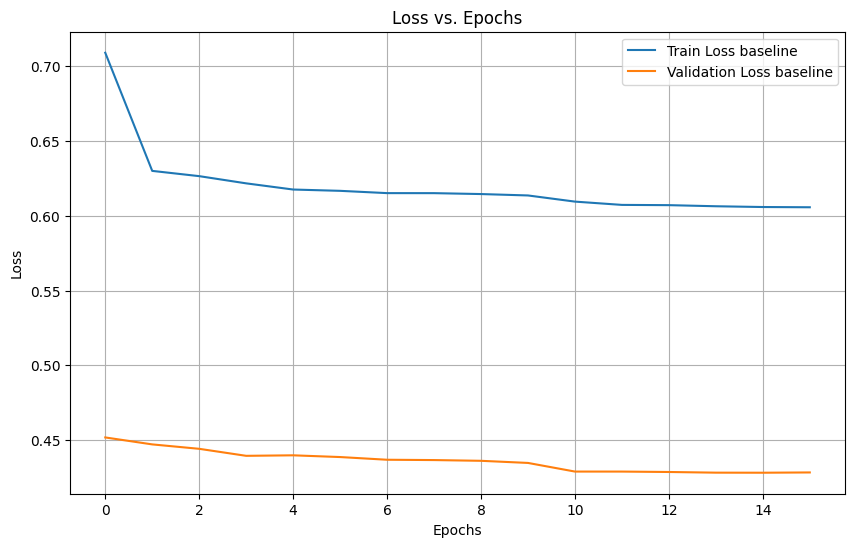

In [ ]:
# @title
# Define Autoencoder model
class Autoencoder_base(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder_base, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

def train_eval( x_train, x_val, epochs, batch_size, input_dim):
    best_loss = float('inf')
    # Early stopping parameters
    patience = 5  # 连续5次没有改善就停止
    min_delta = 0.001  # 最小改善阈值
    patience_counter = 0

    model = Autoencoder_base(input_dim, 16).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters())

    train_loader_b = DataLoader(TensorDataset(x_train, x_train), batch_size=batch_size, shuffle=True)
    val_loader_b = DataLoader(TensorDataset(x_val, x_val), batch_size=batch_size)
    best_model_state = None
    train_loss_baseline_all=[]
    val_loss_baseline_all=[]
    # Training loop
    for epoch in range(epochs):
        model.train()
        train_loss_b = 0
        num_batches = 0
        for batch in train_loader_b:
            batch = batch[0].to(device)  # Move batch to GPU
            optimizer.zero_grad()
            outputs = model(batch)
            loss = criterion(outputs, batch)
            loss.backward()
            optimizer.step()
            train_loss_b += loss.item()
            num_batches += 1
        train_loss_b /= num_batches
        train_loss_baseline_all.append(train_loss_b)

        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch_x, _ in val_loader_b:
                outputs = model(batch_x)
                val_loss += criterion(outputs, batch_x).item()
        val_loss /= len(val_loader_b)
        val_loss_baseline_all.append(val_loss)

        # Early stopping check
        if val_loss < best_loss - min_delta:
            best_loss = val_loss
            patience_counter = 0
            best_model_state = model.state_dict().copy()  # 存储模型状态而不是保存到文件
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'Early stopping triggered at epoch {epoch+1}')
                break

    model.load_state_dict(best_model_state)
    return model, train_loss_baseline_all, val_loss_baseline_all

epochs = 50
batch_size = 32
input_dim = normal_data.shape[1]
model_baseline, train_losses_baseline, val_losses_baseline = train_eval(x_train=x_train, x_val=x_val,
                                             epochs=epochs, batch_size=batch_size, input_dim=input_dim)
threshold_baseline = calculate_threshold(model_baseline, normal_tensor)

y_pred_baseline = detect_anomalies(model_baseline, test_tensor, threshold_baseline)
y_test_binary = (y_test != 'Benign').astype(int)
Accuracy_baseline = np.mean(y_pred_baseline == y_test_binary)

# Print results
print(f'Accuracy: {Accuracy_baseline}')
print(f'Threshold: {threshold_baseline}')
print(classification_report(y_test_binary, y_pred_baseline))
print(confusion_matrix(y_test_binary, y_pred_baseline))

plt.figure(figsize=(10, 6))
plt.plot(train_losses_baseline, label='Train Loss baseline')
plt.plot(val_losses_baseline, label='Validation Loss baseline')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


**Define the Autoencoder**

In [ ]:
# @title
class Autoencoder(nn.Module):
    def __init__(self, input_dim, params, activation='ReLU', output_activation='Sigmoid'):
        super(Autoencoder, self).__init__()
        self.input_dim = input_dim
        #self.encoding_dims = encoding_dims
        self.activation = getattr(nn, activation)()
        self.output_activation = getattr(nn, output_activation)()
        self.params= params.flatten()

        n_layers= max(1, int(np.round(self.params[0])))
        encoder_layers = []
        in_features = input_dim

        dims = [int(np.round(n)) for n in self.params[1:n_layers+1]]
        for i in dims:
            encoder_layers.append(nn.Linear(in_features, i))
            encoder_layers.append(self.activation)
            in_features = i
        self.encoder = nn.Sequential(*encoder_layers)

        # Decoder
        decoder_layers = []
        in_features = dims[-1]
        reversed_dims = dims[:-1][::-1] + [input_dim]
        for dim in reversed_dims:
            decoder_layers.append(nn.Linear(in_features, dim))
            if dim != input_dim:
                decoder_layers.append(self.activation)
            else:
                decoder_layers.append(self.output_activation)
            in_features = dim
        self.decoder = nn.Sequential(*decoder_layers)

    def to(self, device):
        super(Autoencoder, self).to(device)
        self.device = device
        return self

    def forward(self, x):
        x = x.to(self.device)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

**Define the Normal PSO Optimizer**

In [ ]:
# @title
class PSOOptimizer:
    def __init__(self, n_particles, dimensions, options, bounds, input_dim, epochs,batch_size):
        self.n_particles = n_particles
        self.dimensions = dimensions
        self.options = options
        self.bounds = bounds
        self.input_dim = input_dim
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.epochs = epochs
        self.batch_size = batch_size
        self.best_loss_history = []

        self.optimizer = GlobalBestPSO(n_particles=self.n_particles,
                                       dimensions=self.dimensions,
                                       options=self.options,
                                       bounds=self.bounds)

    def optimize(self, iters):
        patience = 5  # 连续5次没有改善就停止
        min_delta = 0.001  # 最小改善阈值
        self.current_iteration =0
        self.best_cost = float('inf')
        no_improvement_count = 0
        self.best_pos=None

        def pso_objective(particles):
            self.current_iteration += 1
            costs = self.objective_function(particles)  # 计算所有粒子的成本
            current_best_cost = float(costs.min())  # 当前最小成本

            # 记录历史
            nonlocal no_improvement_count
            if current_best_cost < self.best_cost - min_delta:
                # 有显著改善
                self.best_cost = current_best_cost
                self.best_pos = particles[costs.argmin()].copy()
                no_improvement_count = 0
            else:
                # 没有显著改善
                no_improvement_count += 1

            # 打印更详细的信息
            print(f"Iteration {self.current_iteration}: "
                  f"Best Cost: {current_best_cost:.6f} | "
                  f"No improvement count: {no_improvement_count}/{patience}")

            if no_improvement_count >= patience:
                print(f"Early stopping triggered! No improvement for {patience} iterations")
                raise StopIteration("Early stopping triggered!")

            self.best_loss_history.append(current_best_cost)
            return costs
        try:
            # 执行PSO优化
            best_cost, best_pos = self.optimizer.optimize(pso_objective,
                                                        iters=iters)
        except StopIteration as e:
            print(str(e))
            best_cost = min(self.best_loss_history)
            best_pos = self.best_pos

        return best_cost, best_pos, self.best_loss_history

    def objective_function(self, params):
        losses = []
        for idx, p in enumerate(params):
            #encoding_dims = self.create_encoding_dims(p)
            model = Autoencoder(input_dim=self.input_dim, params= p).to(self.device)
            optimizer = optim.Adam(model.parameters(),lr=p[-1])
            criterion = nn.MSELoss()

            train_loader = DataLoader(TensorDataset(x_train, x_train), batch_size=self.batch_size, shuffle=True)
            val_loader = DataLoader(TensorDataset(x_val, x_val), batch_size=self.batch_size)
            best_val_loss = float('inf')
            best_train_loss = float('inf')

            print(f"\nTraining Particle {idx + 1}/{len(params)}:")
            print("Structure:", np.round(p[:-1]).astype(int), "Learning Rate:", p[-1])

            for epoch in range(self.epochs):
                model.train()
                epoch_train_loss = 0
                num_batches= 0
                for batch_x, _ in train_loader:
                    batch_x = batch_x.to(self.device)
                    optimizer.zero_grad()
                    outputs = model(batch_x)
                    loss = criterion(outputs, batch_x)
                    loss.backward()
                    optimizer.step()
                    epoch_train_loss += loss.item()
                    num_batches += 1
                epoch_train_loss /= num_batches
                if epoch_train_loss < best_train_loss:
                    best_train_loss = epoch_train_loss
                    torch.save(model.state_dict(), f'best_model_particle_{idx+1}.pth')


                # Validation
                model.eval()
                val_loss = 0
                with torch.no_grad():
                    for batch_x, _ in val_loader:
                        outputs = model(batch_x)
                        val_loss += criterion(outputs, batch_x).item()
                    val_loss /= len(val_loader)

                if val_loss <best_val_loss:
                    best_val_loss = val_loss
                    torch.save(model.state_dict(), f'best_model_particle_{idx+1}.pth')

                #print(f'Particle {idx+1}, Epoch [{epoch+1}/{self.epochs}], Train Loss: {best_train_loss:.4f}, Val Loss: {best_val_loss:.4f}')
            losses.append(best_val_loss)
        return np.array(losses)

**Resules of the Normal Optimizer**

In [ ]:
# @title
input_dim = normal_data.shape[1]
n_particles = 20
iters = 30
dimensions = 5  # 4 for encoding_dims + 1 for learning_rate
bounds = ((1, 32,16, 8, 0.0001), (3, 128, 64, 32, 0.01))
epochs = 30
options = {'c1': 2, 'c2': 2, 'w': 0.9}
batch_size= 32
pso_optimizer = PSOOptimizer(n_particles=n_particles,dimensions=dimensions,options=options,
                             bounds=bounds,input_dim=input_dim,
                             epochs=epochs, batch_size=batch_size)
best_cost, best_pos,best_loss_history = pso_optimizer.optimize(iters=iters)
print(f"Best Cost: {best_cost}")
print(f"Best Position: {best_pos}")

best_model_beseline = Autoencoder(input_dim=input_dim,
                         params=best_pos
                         ).to(device)

summary(best_model, input_size=(input_dim,))

y_pred_best_baseline = detect_anomalies(best_model,
                               test_tensor,
                               calculate_threshold(best_model, normal_tensor))
y_test_binary = (y_test != 'Benign').astype(int)

print(classification_report(y_test_binary, y_pred_best))
print(f'Test Accuracy: {np.mean(y_pred_best == y_test_binary)}')

plt.figure(figsize=(10, 6))
plt.plot(best_loss_history)
plt.title('Loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Best Loss')
plt.grid(True)
plt.show()

In [ ]:
# @title
input_dim = normal_data.shape[1]
n_particles = 20
iters = 30
c1=2
c2=2
#w=0.7
dimensions = 5  # 4 for encoding_dims
bounds = ((1, 16, 8, 4,2), (4, 128, 64, 32,16))

epochs = 10
batch_size= 64
for w in tqdm([0.4,0.5,0.6,0.7,0.8,0.9], desc="Optimizing w", unit="w"):
    best_cost_w_all=[]
    options = {'c1': c1, 'c2': c2, 'w': w}
    pso_optimizer = PSOOptimizer(n_particles=n_particles,
                                 dimensions=dimensions,
                                 options=options,
                                 bounds=bounds,
                                 input_dim=input_dim,
                                 epochs=epochs,
                                 batch_size=batch_size)

    best_cost_w, best_pos_w, best_model_w, best_loss_history_w= pso_optimizer.optimize(iters=iters)
    best_model_w = Autoencoder(input_dim=input_dim, params=best_pos_w).to(device)

    summary(best_model_w, input_size=(input_dim,))

    y_pred_best_w = detect_anomalies(best_model_w,
                               test_tensor,
                               calculate_threshold(best_model_w, normal_tensor))
    y_test_binary = (y_test != 'Benign').astype(int)
    Accuracy_w = np.mean(y_pred_best_w == y_test_binary)

    print(f'Test Accuracy: {Accuracy_w}')
    print(classification_report(y_test_binary, y_pred_best_w))

    plt.figure(figsize=(10, 6))
    plt.plot(best_loss_history_w)
    plt.title('Loss vs. Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Best Loss')
    plt.grid(True)
    plt.show()

**Define the Line PSO Optimizer**

In [ ]:
# @title
class LPSOOptimizer:
    def __init__(self, n_particles, dimensions, options, bounds, input_dim, epochs, batch_size):
        self.input_dim = input_dim
        self.epochs = epochs
        self.batch_size = batch_size
        self.n_particles = n_particles
        self.dimensions = dimensions
        self.bounds = bounds
        self.device = device
        self.options = options


        # PSO参数
        self.w_max = 1.2  # 最大惯性权重
        self.w_min = 0.4  # 最小惯性权重
        self.c1 = self.options['c1']  # 认知学习因子
        self.c2 = self.options['c2']  # 社会学习因子
        self.bounds_min = np.array(bounds[0])
        self.bounds_max = np.array(bounds[1])
        # 初始化粒子群

        self.positions = np.zeros((n_particles, dimensions))
        for d in range(dimensions):
            self.positions[:, d] = np.random.uniform(
                self.bounds_min[d],
                self.bounds_max[d],
                size=n_particles
            )


        self.velocities = np.zeros((n_particles, dimensions))
        self.personal_best_positions = self.positions.copy()
        self.personal_best_scores = np.full(n_particles, float('inf'))
        self.global_best_position = self.positions[0].copy()
        self.global_best_score = float('inf')

        # 历史记录
        self.cost_history = []
        self.best_cost_history = []
        self.avg_cost_history = []

    def _update_weight(self, current_iter, max_iter):
        """线性递减权重更新"""
        return self.w_max - (self.w_max - self.w_min) * current_iter / max_iter

    def optimize(self, iters):
        """PSO优化主循环"""
        for iteration in tqdm(range(iters), desc="PSO Optimization"):
            # 计算当前权重
            current_w = self._update_weight(iteration, iters)
            iteration_costs = []

            for i in range(self.n_particles):
                try:
                    self.positions[i] = np.clip(
                    self.positions[i],
                    self.bounds_min,
                    self.bounds_max)
                    # 评估当前位置
                    current_score = self.objective_function(self.positions[i])
                    iteration_costs.append(current_score)

                    # 更新个体最优
                    if current_score < self.personal_best_scores[i]:
                        self.personal_best_scores[i] = current_score
                        self.personal_best_positions[i] = self.positions[i].copy()

                        # 更新全局最优
                        if current_score < self.global_best_score:
                            self.global_best_score = current_score
                            self.global_best_position = self.positions[i].copy()

                except Exception as e:
                    print(f"Error in particle {i+1}: {e}")
                    continue

                # 更新速度和位置
                r1, r2 = np.random.random(2)
                self.velocities[i] = (current_w * self.velocities[i] +
                                    self.c1 * r1 * (self.personal_best_positions[i] - self.positions[i]) +
                                    self.c2 * r2 * (self.global_best_position - self.positions[i]))

                self.positions[i] += self.velocities[i]
                self.positions[i] = np.clip(self.positions[i], self.bounds[0], self.bounds[1])

            # 记录历史
            if iteration_costs:
                self.cost_history.extend(iteration_costs)
                self.avg_cost_history.append(np.mean(iteration_costs))
                self.best_cost_history.append(self.global_best_score)

        return self.global_best_score, self.global_best_position,self.avg_cost_history, self.best_cost_history

    def objective_function(self, params):

            #for idx, p in enumerate(params):

            model = Autoencoder(input_dim=self.input_dim, params=params).to(self.device)
            optimizer = optim.Adam(model.parameters(),lr=params[-1])
            criterion = nn.MSELoss()

            train_loader = DataLoader(TensorDataset(x_train, x_train), batch_size=self.batch_size, shuffle=True)
            val_loader = DataLoader(TensorDataset(x_val, x_val), batch_size=self.batch_size)
            best_val_loss = float('inf')
            best_train_loss = float('inf')

            for epoch in range(self.epochs):
                model.train()
                epoch_train_loss = 0
                num_batches= 0
                for batch_x, _ in train_loader:
                    batch_x = batch_x.to(self.device)
                    optimizer.zero_grad()
                    outputs = model(batch_x)
                    loss = criterion(outputs, batch_x)
                    loss.backward()
                    optimizer.step()
                    epoch_train_loss += loss.item()
                    num_batches += 1
                epoch_train_loss /= num_batches
                if epoch_train_loss < best_train_loss:
                    best_train_loss = epoch_train_loss

                # Validation
                model.eval()
                val_loss = 0
                with torch.no_grad():
                    for batch_x, _ in val_loader:
                        outputs = model(batch_x)
                        val_loss += criterion(outputs, batch_x).item()
                    val_loss /= len(val_loader)

                if val_loss <best_val_loss:
                    best_val_loss = val_loss

            return best_val_loss

    def plot_convergence(self, save_path=None):
        """绘制收敛曲线"""
        plt.figure(figsize=(12, 6))

        # 绘制平均cost曲线
        plt.plot(self.avg_cost_history, 'b-', label='Average Cost', alpha=0.5)
        # 绘制最佳cost曲线
        plt.plot(self.best_cost_history, 'r-', label='Best Cost')

        plt.title('PSO Convergence Curve')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.legend()
        plt.grid(True)

        if save_path:
            plt.savefig(save_path)
        plt.show()


**Results of the Line PSO Optimizer**

In [ ]:
# @title
input_dim = normal_data.shape[1]
n_particles = 50
iters = 50
dimensions = 5  # 4 for encoding_dims + 1 for learning_rate
bounds = ((1, 8,4, 2, 0.0001), (3, 128, 64, 32, 0.01))
options= {'c1': 2, 'c2': 2}
epochs = 30
batch_size= 64
Loptimizer = LPSOOptimizer(n_particles=n_particles,
                           dimensions=dimensions,
                           bounds=bounds,
                           options=options,
                           input_dim= input_dim,
                           epochs=epochs,
                           batch_size=batch_size)
global_best_score_l, global_best_position_l,avg_cost_history_l, best_cost_history_l = Loptimizer.optimize(iters=iters)



print(f"Best Cost: {global_best_score_l}")
print(f"Best Position: {global_best_position_l}")

best_model_l = Autoencoder(input_dim=input_dim,
                         params=global_best_position_l
                         ).to(device)

summary(best_model_l, input_size=(input_dim,))

y_pred_best_l = detect_anomalies(best_model_l,
                               test_tensor,
                               calculate_threshold(best_model_l, normal_tensor))
y_test_binary = (y_test != 'Benign').astype(int)
Accuracy_l = np.mean(y_pred_best_l == y_test_binary)
print(f'Test Accuracy: {Accuracy_l}')
print(classification_report(y_test_binary, y_pred_best_l))

plt.figure(figsize=(10, 6))
plt.plot(best_cost_history_l, 'r-', label='Best Cost')
plt.plot(avg_cost_history_l, 'b-', label='Average Cost', alpha=0.5)
plt.title('Loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Best Loss')
plt.grid(True)
plt.show()

PSO Optimization:  12%|█▏        | 6/50 [8:40:52<61:39:36, 5044.91s/it]

**Define the Adaptive PSO Optimizer**

In [ ]:
# @title
class APSOOptimizer:
    def __init__(self, n_particles, dimensions, options, bounds,input_dim, epochs, batch_size):
        self.input_dim = input_dim
        self.epochs = epochs
        self.n_particles = n_particles
        self.dimensions = dimensions
        self.bounds = bounds
        self.device = device
        self.options = options
        self.batch_size = batch_size

        # PSO基本参数
        self.w_max = 0.9  # 最大惯性权重
        self.w_min = 0.4  # 最小惯性权重
        self.c1 = options['c1']  # 认知学习因子
        self.c2 = options['c2']  # 社会学习因子

        # 记录收敛历史
        self.cost_history = []
        self.avg_cost_history = []
        self.best_cost_history = []
        self.weight_history = []  # 记录权重变化

        # 初始化粒子群
        self.positions = np.random.uniform(
            low=bounds[0],
            high=bounds[1],
            size=(n_particles, dimensions)
        )
        self.velocities = np.zeros((n_particles, dimensions))
        self.personal_best_positions = self.positions.copy()
        self.personal_best_scores = np.full(n_particles, float('inf'))
        self.global_best_position = None
        self.global_best_score = float('inf')

        # 用于自适应权重的参数
        self.success_threshold = 5  # 成功阈值
        self.failure_threshold = 3  # 失败阈值
        self.success_count = 0      # 成功计数
        self.failure_count = 0      # 失败计数
        self.beta = 0.5            # 权重调整系数
        self.current_w = self.w_max # 当前权重

    def _update_adaptive_weight(self, prev_best, current_best):
        """自适应惯性权重更新

        基于粒子群搜索效果动态调整权重:
        1. 如果连续多次找到更好解，增加权重以扩大搜索范围
        2. 如果连续多次没有改进，减小权重以细化局部搜索
        3. 权重始终保持在[w_min, w_max]范围内
        """
        if current_best < prev_best:  # 找到更好的解
            self.success_count += 1
            self.failure_count = 0
            if self.success_count >= self.success_threshold:
                # 增加权重以扩大搜索
                self.current_w = min(self.w_max,
                                   self.current_w * (1 + self.beta))
                self.success_count = 0
        else:  # 没有找到更好的解
            self.failure_count += 1
            self.success_count = 0
            if self.failure_count >= self.failure_threshold:
                # 减小权重以细化搜索
                self.current_w = max(self.w_min,
                                   self.current_w * (1 - self.beta))
                self.failure_count = 0

        return self.current_w

    def optimize(self, iters):
        """PSO优化主循环"""
        prev_best_score = float('inf')

        for iteration in tqdm(range(iters), desc="PSO Optimization"):
            iteration_costs = []

            for i in range(self.n_particles):
                # 评估当前位置
                current_score = self.objective_function(self.positions[i])
                iteration_costs.append(current_score)

                # 更新个体最优
                if current_score < self.personal_best_scores[i]:
                    self.personal_best_scores[i] = current_score
                    self.personal_best_positions[i] = self.positions[i].copy()

                    # 更新全局最优
                    if current_score < self.global_best_score:
                        self.global_best_score = current_score
                        self.global_best_position = self.positions[i].copy()

            # 自适应更新权重
            current_w = self._update_adaptive_weight(prev_best_score, self.global_best_score)
            prev_best_score = self.global_best_score

            # 更新所有粒子的位置和速度
            for i in range(self.n_particles):
                r1, r2 = np.random.random(2)

                # 速度更新
                self.velocities[i] = (current_w * self.velocities[i] +
                                    self.c1 * r1 * (self.personal_best_positions[i] - self.positions[i]) +
                                    self.c2 * r2 * (self.global_best_position - self.positions[i]))

                # 位置更新
                self.positions[i] += self.velocities[i]
                self.positions[i] = np.clip(self.positions[i], self.bounds[0], self.bounds[1])

            # 记录历史
            self.cost_history.extend(iteration_costs)
            self.avg_cost_history.append(np.mean(iteration_costs))
            self.best_cost_history.append(self.global_best_score)
            self.weight_history.append(current_w)

        return self.global_best_score, self.global_best_position, self.avg_cost_history, self.best_cost_history

    def objective_function(self, params):

        model = Autoencoder(input_dim=self.input_dim, params=params).to(self.device)
        optimizer = optim.Adam(model.parameters(),lr=params[-1])
        criterion = nn.MSELoss()

        train_loader = DataLoader(TensorDataset(x_train, x_train), batch_size=self.batch_size, shuffle=True)
        val_loader = DataLoader(TensorDataset(x_val, x_val), batch_size=self.batch_size)
        best_val_loss = float('inf')
        best_train_loss = float('inf')

        for epoch in range(self.epochs):
            model.train()
            epoch_train_loss = 0
            num_batches= 0
            for batch_x, _ in train_loader:
                batch_x = batch_x.to(self.device)
                optimizer.zero_grad()
                outputs = model(batch_x)
                loss = criterion(outputs, batch_x)
                loss.backward()
                optimizer.step()
                epoch_train_loss += loss.item()
                num_batches += 1
            epoch_train_loss /= num_batches
            if epoch_train_loss < best_train_loss:
                best_train_loss = epoch_train_loss

            # Validation
            model.eval()
            val_loss = 0
            with torch.no_grad():
                for batch_x, _ in val_loader:
                    outputs = model(batch_x)
                    val_loss += criterion(outputs, batch_x).item()
                val_loss /= len(val_loader)

            if val_loss <best_val_loss:
                best_val_loss = val_loss

        return best_val_loss

    def plot_convergence(self, save_path=None):
        """绘制收敛曲线和权重变化"""
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

        # 绘制cost曲线
        ax1.plot(self.avg_cost_history, 'b-', label='Average Cost', alpha=0.5)
        ax1.plot(self.best_cost_history, 'r-', label='Best Cost')
        ax1.set_title('PSO Convergence Curve')
        ax1.set_xlabel('Iteration')
        ax1.set_ylabel('Cost')
        ax1.legend()
        ax1.grid(True)

        # 绘制权重变化曲线
        ax2.plot(self.weight_history, 'g-', label='Inertia Weight')
        ax2.set_title('Adaptive Inertia Weight Change')
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Weight')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()

        if save_path:
            plt.savefig(save_path)
        plt.show()

**Results of the Adaptive PSO Optimizer**

PSO Optimization: 100%|██████████| 30/30 [3:45:48<00:00, 451.61s/it]


Best Cost: 0.35799858523976236
Best Position: [3.00000000e+00 1.07505756e+02 8.61194932e+00 2.26553057e+01
 3.16945555e-03]
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 108]           4,536
              ReLU-2                  [-1, 108]               0
              ReLU-3                  [-1, 108]               0
              ReLU-4                  [-1, 108]               0
            Linear-5                    [-1, 9]             981
              ReLU-6                    [-1, 9]               0
              ReLU-7                    [-1, 9]               0
              ReLU-8                    [-1, 9]               0
            Linear-9                   [-1, 23]             230
             ReLU-10                   [-1, 23]               0
             ReLU-11                   [-1, 23]               0
             ReLU-12                   [-1,

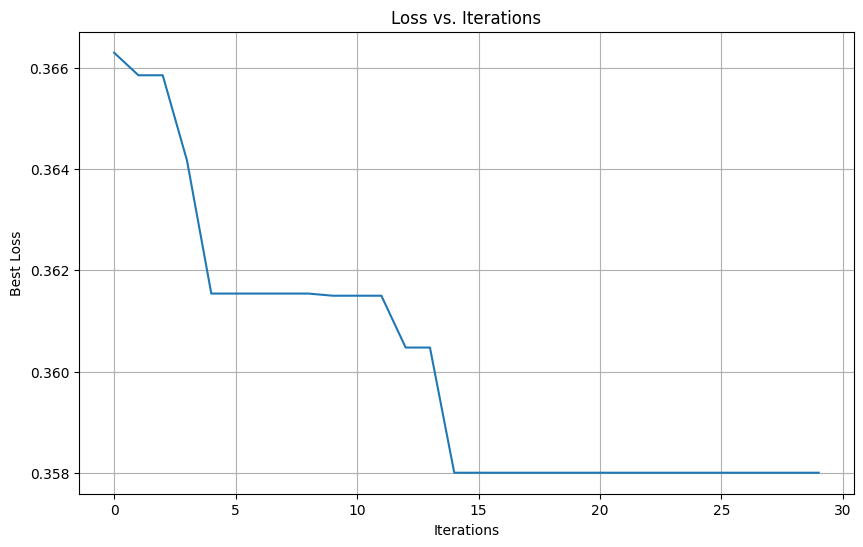

In [ ]:
# @title
input_dim = normal_data.shape[1]
n_particles = 20
iters = 30
dimensions = 5  # 4 for encoding_dims + 1 for learning_rate
bounds = ((3, 16,8, 4, 0.0001), (3, 128, 64, 32, 0.01))
options= {'c1': 2, 'c2': 2}
epochs = 30
batch_size= 32
Aoptimizer =APSOOptimizer(n_particles=n_particles,
                           dimensions=dimensions,
                           bounds=bounds,
                           options=options,
                           input_dim= input_dim,
                           epochs=epochs,
                           batch_size=batch_size)
global_best_score_a, global_best_position_a,avg_cost_history_a, best_cost_history_a = Aoptimizer.optimize(iters=iters)



print(f"Best Cost: {global_best_score_a}")
print(f"Best Position: {global_best_position_a}")

best_model_a = Autoencoder(input_dim=input_dim,
                         params=global_best_position_a
                         ).to(device)

summary(best_model_a, input_size=(input_dim,))

y_pred_a = detect_anomalies(best_model_a,
                               test_tensor,
                               calculate_threshold(best_model_a, normal_tensor))
y_test_binary = (y_test != 'Benign').astype(int)
Accuracy_a = np.mean(y_pred_a == y_test_binary)

print(f'Test Accuracy: {Accuracy_a}')
print(classification_report(y_test_binary, y_pred_a))

plt.figure(figsize=(10, 6))
plt.plot(best_cost_history_a)
plt.title('Loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Best Loss')
plt.grid(True)
plt.show()

**Comparosion**

No learning rate

In [ ]:
# @title
class Autoencoder(nn.Module):
    def __init__(self, input_dim, params, activation='ReLU', output_activation='Sigmoid'):
        super(Autoencoder, self).__init__()
        self.input_dim = input_dim
        self.activation = getattr(nn, activation)()
        self.output_activation = getattr(nn, output_activation)()
        self.params= params.flatten()

        n_layers= max(1, int(np.round(self.params[0])))
        encoder_layers = []
        in_features = input_dim

        dims = [int(np.round(n)) for n in self.params[1:n_layers+1]]
        for i in dims:
            encoder_layers.append(nn.Linear(in_features, i))
            encoder_layers.append(self.activation)
            in_features = i
        self.encoder = nn.Sequential(*encoder_layers)

        # Decoder
        decoder_layers = []
        in_features = dims[-1]
        reversed_dims = dims[:-1][::-1] + [input_dim]
        for dim in reversed_dims:
            decoder_layers.append(nn.Linear(in_features, dim))
            if dim != input_dim:
                decoder_layers.append(self.activation)
            else:
                decoder_layers.append(self.output_activation)
            in_features = dim
        self.decoder = nn.Sequential(*decoder_layers)

    def to(self, device):
        super(Autoencoder, self).to(device)
        self.device = device
        return self

    def forward(self, x):
        x = x.to(self.device)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
# @title
class APSOOptimizer:
    def __init__(self, n_particles, dimensions, options, bounds,input_dim, epochs, batch_size):
        self.input_dim = input_dim
        self.epochs = epochs
        self.n_particles = n_particles
        self.dimensions = dimensions
        self.bounds = bounds
        self.device = device
        self.options = options
        self.batch_size = batch_size

        # PSO基本参数
        self.w_max = 0.9  # 最大惯性权重
        self.w_min = 0.4  # 最小惯性权重
        self.c1 = options['c1']  # 认知学习因子
        self.c2 = options['c2']  # 社会学习因子

        # 记录收敛历史
        self.cost_history = []
        self.avg_cost_history = []
        self.best_cost_history = []
        self.weight_history = []  # 记录权重变化

        # 初始化粒子群
        self.positions = np.random.uniform(
            low=bounds[0],
            high=bounds[1],
            size=(n_particles, dimensions)
        )
        self.velocities = np.zeros((n_particles, dimensions))
        self.personal_best_positions = self.positions.copy()
        self.personal_best_scores = np.full(n_particles, float('inf'))
        self.global_best_position = None
        self.global_best_score = float('inf')

        # 用于自适应权重的参数
        self.success_threshold = 5  # 成功阈值
        self.failure_threshold = 3  # 失败阈值
        self.success_count = 0      # 成功计数
        self.failure_count = 0      # 失败计数
        self.beta = 0.5            # 权重调整系数
        self.current_w = self.w_max # 当前权重

    def _update_adaptive_weight(self, prev_best, current_best):
        """自适应惯性权重更新

        基于粒子群搜索效果动态调整权重:
        1. 如果连续多次找到更好解，增加权重以扩大搜索范围
        2. 如果连续多次没有改进，减小权重以细化局部搜索
        3. 权重始终保持在[w_min, w_max]范围内
        """
        if current_best < prev_best:  # 找到更好的解
            self.success_count += 1
            self.failure_count = 0
            if self.success_count >= self.success_threshold:
                # 增加权重以扩大搜索
                self.current_w = min(self.w_max,
                                   self.current_w * (1 + self.beta))
                self.success_count = 0
        else:  # 没有找到更好的解
            self.failure_count += 1
            self.success_count = 0
            if self.failure_count >= self.failure_threshold:
                # 减小权重以细化搜索
                self.current_w = max(self.w_min,
                                   self.current_w * (1 - self.beta))
                self.failure_count = 0

        return self.current_w

    def optimize(self, iters):
        """PSO优化主循环"""
        prev_best_score = float('inf')

        for iteration in tqdm(range(iters), desc="PSO Optimization"):
            iteration_costs = []

            for i in range(self.n_particles):
                # 评估当前位置
                current_score = self.objective_function(self.positions[i])
                iteration_costs.append(current_score)

                # 更新个体最优
                if current_score < self.personal_best_scores[i]:
                    self.personal_best_scores[i] = current_score
                    self.personal_best_positions[i] = self.positions[i].copy()

                    # 更新全局最优
                    if current_score < self.global_best_score:
                        self.global_best_score = current_score
                        self.global_best_position = self.positions[i].copy()

            # 自适应更新权重
            current_w = self._update_adaptive_weight(prev_best_score, self.global_best_score)
            prev_best_score = self.global_best_score

            # 更新所有粒子的位置和速度
            for i in range(self.n_particles):
                r1, r2 = np.random.random(2)

                # 速度更新
                self.velocities[i] = (current_w * self.velocities[i] +
                                    self.c1 * r1 * (self.personal_best_positions[i] - self.positions[i]) +
                                    self.c2 * r2 * (self.global_best_position - self.positions[i]))

                # 位置更新
                self.positions[i] += self.velocities[i]
                self.positions[i] = np.clip(self.positions[i], self.bounds[0], self.bounds[1])

            # 记录历史
            self.cost_history.extend(iteration_costs)
            self.avg_cost_history.append(np.mean(iteration_costs))
            self.best_cost_history.append(self.global_best_score)
            self.weight_history.append(current_w)

        return self.global_best_score, self.global_best_position, self.avg_cost_history, self.best_cost_history

    def objective_function(self, params):

        model = Autoencoder(input_dim=self.input_dim, params=params).to(self.device)
        optimizer = optim.Adam(model.parameters())
        criterion = nn.MSELoss()

        train_loader = DataLoader(TensorDataset(x_train, x_train), batch_size=self.batch_size, shuffle=True)
        val_loader = DataLoader(TensorDataset(x_val, x_val), batch_size=self.batch_size)
        best_val_loss = float('inf')
        best_train_loss = float('inf')

        for epoch in range(self.epochs):
            model.train()
            epoch_train_loss = 0
            num_batches= 0
            for batch_x, _ in train_loader:
                batch_x = batch_x.to(self.device)
                optimizer.zero_grad()
                outputs = model(batch_x)
                loss = criterion(outputs, batch_x)
                loss.backward()
                optimizer.step()
                epoch_train_loss += loss.item()
                num_batches += 1
            epoch_train_loss /= num_batches
            if epoch_train_loss < best_train_loss:
                best_train_loss = epoch_train_loss

            # Validation
            model.eval()
            val_loss = 0
            with torch.no_grad():
                for batch_x, _ in val_loader:
                    outputs = model(batch_x)
                    val_loss += criterion(outputs, batch_x).item()
                val_loss /= len(val_loader)

            if val_loss <best_val_loss:
                best_val_loss = val_loss

        return best_val_loss

    def plot_convergence(self, save_path=None):
        """绘制收敛曲线和权重变化"""
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

        # 绘制cost曲线
        ax1.plot(self.avg_cost_history, 'b-', label='Average Cost', alpha=0.5)
        ax1.plot(self.best_cost_history, 'r-', label='Best Cost')
        ax1.set_title('PSO Convergence Curve')
        ax1.set_xlabel('Iteration')
        ax1.set_ylabel('Cost')
        ax1.legend()
        ax1.grid(True)

        # 绘制权重变化曲线
        ax2.plot(self.weight_history, 'g-', label='Inertia Weight')
        ax2.set_title('Adaptive Inertia Weight Change')
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Weight')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()

        if save_path:
            plt.savefig(save_path)
        plt.show()

PSO Optimization: 100%|██████████| 30/30 [1:00:46<00:00, 121.55s/it]

Best Cost: 0.38246414065361023
Best Position: [  3.        128.          8.         12.8284401]
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]           5,376
              ReLU-2                  [-1, 128]               0
              ReLU-3                  [-1, 128]               0
              ReLU-4                  [-1, 128]               0
            Linear-5                    [-1, 8]           1,032
              ReLU-6                    [-1, 8]               0
              ReLU-7                    [-1, 8]               0
              ReLU-8                    [-1, 8]               0
            Linear-9                   [-1, 13]             117
             ReLU-10                   [-1, 13]               0
             ReLU-11                   [-1, 13]               0
             ReLU-12                   [-1, 13]               0
       

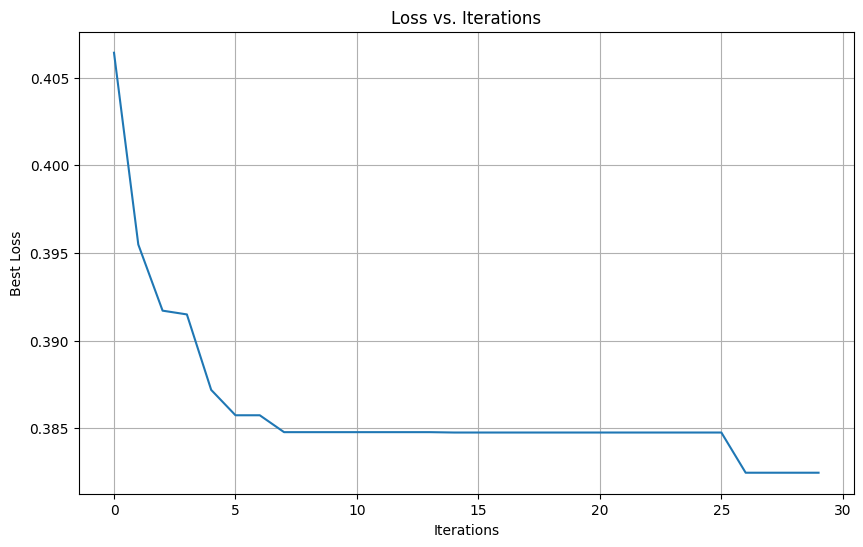

In [ ]:
# @title
input_dim = normal_data.shape[1]
n_particles = 30
iters = 30
dimensions = 4  # 4 for encoding_dims + 1 for learning_rate
bounds = ((3, 16,8, 4), (3, 128, 64, 32))
options= {'c1': 2, 'c2': 2}
epochs = 30
batch_size= 512
Aoptimizer =APSOOptimizer(n_particles=n_particles,
                           dimensions=dimensions,
                           bounds=bounds,
                           options=options,
                           input_dim= input_dim,
                           epochs=epochs,
                           batch_size=batch_size)
global_best_score_a, global_best_position_a,avg_cost_history_a, best_cost_history_a = Aoptimizer.optimize(iters=iters)



print(f"Best Cost: {global_best_score_a}")
print(f"Best Position: {global_best_position_a}")

best_model_a = Autoencoder(input_dim=input_dim,
                         params=global_best_position_a
                         ).to(device)

summary(best_model_a, input_size=(input_dim,))

y_pred_a = detect_anomalies(best_model_a,
                               test_tensor,
                               calculate_threshold(best_model_a, normal_tensor))
y_test_binary = (y_test != 'Benign').astype(int)
Accuracy_a = np.mean(y_pred_a == y_test_binary)

print(f'Test Accuracy: {Accuracy_a}')
print(classification_report(y_test_binary, y_pred_a))

plt.figure(figsize=(10, 6))
plt.plot(best_cost_history_a)
plt.title('Loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Best Loss')
plt.grid(True)
plt.show()

混合自适应

In [ ]:
class PSOOptimizer:
    def __init__(self, n_particles, dimensions, bounds):
        self.n_particles = n_particles
        self.dimensions = dimensions
        self.bounds = bounds
        self.w_max = 1.2
        self.w_min = 0.4
        self.c1 = 2.5
        self.c2 = 2.5
        self.stagnation_threshold = 5
        self.improvement_history = []
        self.stagnation_counter = 0

    def _calculate_population_diversity(self):
        """计算种群多样性"""
        mean_position = np.mean(self.positions, axis=0)
        diversity = np.mean([np.linalg.norm(p - mean_position) for p in self.positions])
        return diversity

    def _update_inertia_weight(self, current_iter, max_iter):
        """改进的混合自适应权重策略"""
        # 基础非线性衰减
        alpha = 2.0
        base_w = self.w_min + (self.w_max - self.w_min) * ((1 - current_iter/max_iter)**alpha)

        # 计算最近的改进
        if len(self.improvement_history) >= 2:
            recent_improvement = (self.improvement_history[-2] - self.improvement_history[-1])
            relative_improvement = recent_improvement / (self.improvement_history[-2] + 1e-10)
        else:
            relative_improvement = float('inf')

        # 计算种群多样性
        diversity = self._calculate_population_diversity()

        # 自适应调整
        if relative_improvement < 0.001:  # 停滞状态
            self.stagnation_counter += 1
        else:
            self.stagnation_counter = max(0, self.stagnation_counter - 1)

        # 根据停滞状态和多样性动态调整权重
        if self.stagnation_counter > self.stagnation_threshold:
            # 增加探索性
            diversity_factor = np.exp(-diversity)  # 多样性低时，增加更多权重
            w = min(self.w_max, base_w * (1 + 0.2 * diversity_factor))

            # 如果持续停滞，周期性增加权重
            if self.stagnation_counter > self.stagnation_threshold * 2:
                phase = np.sin(2 * np.pi * current_iter / 20)  # 周期性波动
                w = w * (1 + 0.1 * phase)
        else:
            # 正常优化阶段
            w = base_w

        return np.clip(w, self.w_min, self.w_max)

    def optimize(self, objective_function, max_iter=200):
        self.positions = np.random.uniform(
            self.bounds[0], self.bounds[1],
            (self.n_particles, self.dimensions)
        )
        self.velocities = np.zeros((self.n_particles, self.dimensions))
        self.pbest = self.positions.copy()
        self.pbest_values = np.array([objective_function(p) for p in self.positions])
        self.gbest = self.pbest[np.argmin(self.pbest_values)]
        self.gbest_value = np.min(self.pbest_values)

        for iter in range(max_iter):
            # 更新权重
            w = self._update_inertia_weight(iter, max_iter)

            # 更新速度和位置
            for i in range(self.n_particles):
                r1, r2 = np.random.rand(2)

                # 速度更新
                self.velocities[i] = (w * self.velocities[i] +
                                    self.c1 * r1 * (self.pbest[i] - self.positions[i]) +
                                    self.c2 * r2 * (self.gbest - self.positions[i]))

                # 位置更新
                self.positions[i] += self.velocities[i]
                self.positions[i] = np.clip(self.positions[i], self.bounds[0], self.bounds[1])

                # 评估新位置
                value = objective_function(self.positions[i])

                # 更新个体最优
                if value < self.pbest_values[i]:
                    self.pbest_values[i] = value
                    self.pbest[i] = self.positions[i].copy()

                    # 更新全局最优
                    if value < self.gbest_value:
                        self.gbest_value = value
                        self.gbest = self.positions[i].copy()

            # 记录当前最优值
            self.improvement_history.append(self.gbest_value)

            # 打印优化进度
            if iter % 10 == 0:
                print(f"Iteration {iter}: Best Cost = {self.gbest_value:.6f}, "
                      f"Inertia Weight = {w:.4f}, "
                      f"Stagnation Counter = {self.stagnation_counter}")

        return self.gbest, self.gbest_value